In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as pplt
import matplotlib.cm as cm
from matplotlib import lines
import datetime
import plotly.graph_objects as go
from matplotlib import rcParams as rcp

# Setting variables

In [5]:
gene_name = input('Gene name: ')
date = str(datetime.date.today())
# joint file of gene
joint_in = r'joint_files_out/' + date + '_' + gene_name.lower() + '_joint_out.csv'
df = pd.read_csv(joint_in)

Gene name: brca2


C:\Users\alexa\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (43,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# For coding sequence

In [6]:
coding_df = df.loc[df['Protein_position'].notnull()].copy()
if df.iloc[0]['Strand'] == '-':
    coding_df.sort_values(by = ['Protein_position']).sort_values(by = ['POS'], ascending = False, ignore_index = True)
elif df.iloc[0]['Strand'] == '+':
    coding_df.sort_values(by = ['Protein_position']).sort_values(by = ['POS'], ascending = True, ignore_index = True)

coding_df['Protein_position'] = coding_df.loc[:,'Protein_position'].astype(int)
coding_df['POS'] = coding_df.loc[:,'POS'].astype(int)
coding_df#.columns#[['CHROM', 'POS', 'REF', 'ALT', 'Protein_position']]

,Identifier,CHROM,POS,REF,ALT,Ref_Trans_VEP,Consequence_VEP,Impact_VEP,EXON,INTRON,...,NCT_SAMPLE_NAME,NCT_Sheet,KGE_RefSeq,NCT_TumorVariantFrequency,NCT_ZYGOSITY,Variant_Rich,HDR_Rich,95%_CI_lower_bound_Rich,95%_CI_upper_bound_Rich,Prev_HDR_Rich
228,13:g.32890598A>C,13,32890598,A,C,NM_000059,start_lost,HIGH,2/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,13:g.32890598A>G,13,32890598,A,G,NM_000059,start_lost,HIGH,2/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,13:g.32890598A>T,13,32890598,A,T,NM_000059,start_lost,HIGH,2/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,13:g.32890599T>A,13,32890599,T,A,NM_000059,start_lost,HIGH,2/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,13:g.32890599T>C,13,32890599,T,C,NM_000059,start_lost,HIGH,2/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42391,13:g.32972906A>G,13,32972906,A,G,NM_000059,stop_retained_variant,LOW,27/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42392,13:g.32972906A>T,13,32972906,A,T,NM_000059,stop_lost,HIGH,27/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42393,13:g.32972907A>C,13,32972907,A,C,NM_000059,stop_lost,HIGH,27/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42394,13:g.32972907A>G,13,32972907,A,G,NM_000059,stop_retained_variant,LOW,27/27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# create groups
stop_df = coding_df.loc[coding_df['Consequence_VEP'] == 'stop_gained']
cadd_phred_coding = coding_df.groupby('Protein_position')[['CADD_PHRED_VEP']].mean()
cadd_raw_coding = coding_df.groupby('Protein_position')[['CADD_RAW_VEP']].mean()

In [10]:
# search for intron begin
intron_begin = []
for el in list(coding_df['POS'].unique()):
    if (el+1) not in list(coding_df['POS'].unique()):
        intron_begin.append(el+.5)
    else:
        continue
#intron_begin

# Begin Easy Visualization

In [66]:
sns.set_style('ticks')

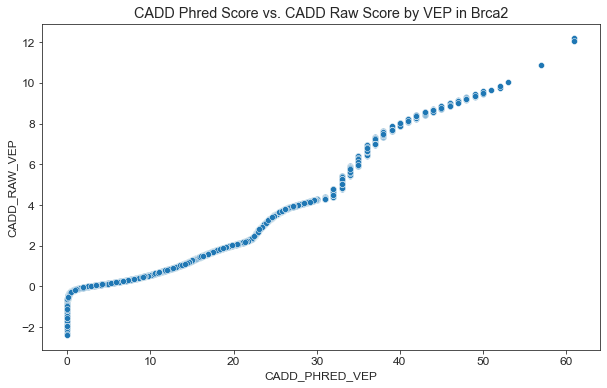

In [70]:
plt.figure(figsize = (10, 6))
#rcp['font.size'] = 12
sns.scatterplot(x = coding_df.CADD_PHRED_VEP, y = coding_df.CADD_RAW_VEP)
plt.title(('CADD Phred Score vs. CADD Raw Score by VEP in ' + gene_name.capitalize()));

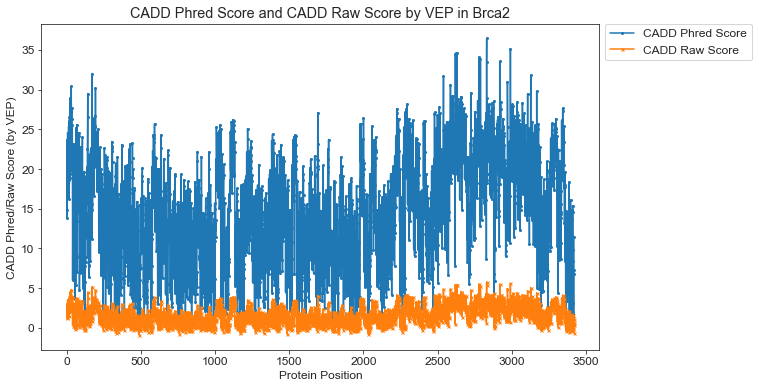

In [71]:
plt.figure(figsize = (10, 6))
rcp['font.size'] = 12
plt.plot(cadd_phred_coding, marker = 'o', ms = 2)
plt.plot(cadd_raw_coding, marker = 'x', ms = 3)
plt.xlabel('Protein Position')
plt.ylabel('CADD Phred/Raw Score (by VEP)')
plt.title(('CADD Phred Score and CADD Raw Score by VEP in ' + gene_name.capitalize()))
plt.legend(['CADD Phred Score', 'CADD Raw Score'], bbox_to_anchor = (1.01, 1), borderaxespad = 0);


In [195]:
posis = list(coding_df['POS'].unique())#.sort(reverse = True)#.loc[df_coding['Consequence_VEP'] == 'stop_gained'])
posis.sort()
#posis[:10]

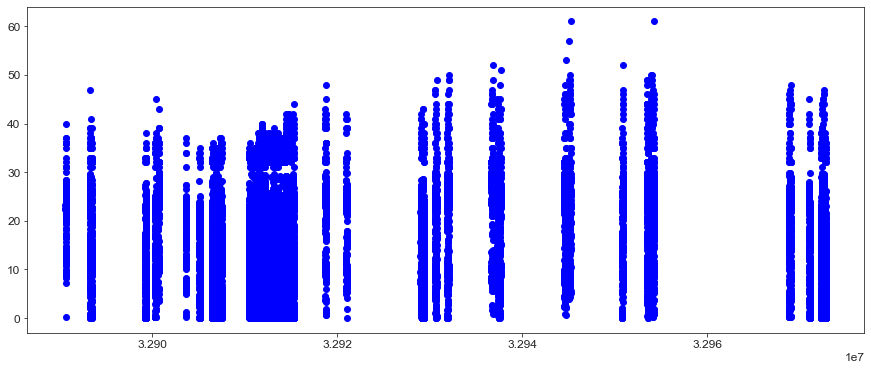

In [120]:
plt.figure(figsize = (15, 6))
plt.plot(coding_df.POS, coding_df.CADD_PHRED_VEP, 'bo')

# Start with grouped nuc/protein positions

In [343]:
stop_df = coding_df.loc[coding_df['Consequence_VEP'] == 'stop_gained'].copy()
stop_df['new_stop'] = 10
new_coding_df = coding_df.merge(stop_df, how = 'outer')
new_coding_df['new_stop'] = new_coding_df['new_stop'].fillna(0).astype(int)
#new_coding_df.loc[new_coding_df['Consequence_VEP'] == 'stop_gained']

In [345]:
# group by nucleic and protein position
nucpos_group = new_coding_df.groupby('POS')
protpos_group = new_coding_df.groupby('Protein_position')
#list(nucpos_group)[0][0]
#nucpos_group.get_group((32890598))
#nucpos_group.get_group(32890598).iloc[1]['CADD_PHRED_VEP']

In [346]:
# seach for highest variant appearance at nucleic position
for gr, df in nucpos_group:
    if len(df) > 6:
        print(gr)

In [347]:
# create subgroups for plotting by each variant
cadd_gr0 = []
cadd_gr1 = []
cadd_gr2 = []
cadd_gr3 = []
cadd_gr4 = []
cadd_gr5 = []
cadd_groups = [cadd_gr0, cadd_gr1, cadd_gr2, cadd_gr3, cadd_gr4, cadd_gr5]

for nucpos, df in list(nucpos_group):
    cadd_gr0.append(df.iloc[0])
    if len(df) > 1:
        cadd_gr1.append(df.iloc[1])
    else:
        pass
    if len(df) > 2:
        cadd_gr2.append(df.iloc[2])
    else:
        pass
    if len(df) > 3:
        cadd_gr3.append(df.iloc[3])
    else:
        pass
    if len(df) > 4:
        cadd_gr4.append(df.iloc[4])
    else:
        pass
    if len(df) > 5:
        cadd_gr5.append(df.iloc[5])
    else:
        pass

# create dataframe for each list
cadd_gr0_df = pd.DataFrame(cadd_gr0)
cadd_gr1_df = pd.DataFrame(cadd_gr1)
cadd_gr2_df = pd.DataFrame(cadd_gr2)
cadd_gr3_df = pd.DataFrame(cadd_gr3)
cadd_gr4_df = pd.DataFrame(cadd_gr4)
cadd_gr5_df = pd.DataFrame(cadd_gr5)

#cadd_gr5_df

In [356]:
m1 = pd.merge(cadd_gr0_df, cadd_gr1_df, on = ['CHROM', 'POS', 'REF'], suffixes = ('_gr0', '_gr1'), how = 'outer')
m2 = pd.merge(m1, cadd_gr2_df, on = ['CHROM', 'POS', 'REF'], how = 'outer').rename(columns = {'CADD_PHRED_VEP':'CADD_PHRED_VEP_gr2', 'ALT':'ALT_gr2', 'Protein_position':'Protein_position_gr2', 'Consequence_VEP':'Consequence_VEP_gr2', 'new_stop':'new_stop_gr2'})
m3 = pd.merge(m2, cadd_gr3_df, on = ['CHROM', 'POS', 'REF'], how = 'outer').rename(columns = {'CADD_PHRED_VEP':'CADD_PHRED_VEP_gr3', 'ALT':'ALT_gr3', 'Protein_position':'Protein_position_gr3', 'Consequence_VEP':'Consequence_VEP_gr3', 'new_stop':'new_stop_gr3'})
m4 = pd.merge(m3, cadd_gr4_df, on = ['CHROM', 'POS', 'REF'], how = 'outer').rename(columns = {'CADD_PHRED_VEP':'CADD_PHRED_VEP_gr4', 'ALT':'ALT_gr4', 'Protein_position':'Protein_position_gr4', 'Consequence_VEP':'Consequence_VEP_gr4', 'new_stop':'new_stop_gr4'})
m5 = pd.merge(m4, cadd_gr5_df, on = ['CHROM', 'POS', 'REF'], how = 'outer').rename(columns = {'CADD_PHRED_VEP':'CADD_PHRED_VEP_gr5', 'ALT':'ALT_gr5', 'Protein_position':'Protein_position_gr5', 'Consequence_VEP':'Consequence_VEP_gr5', 'new_stop':'new_stop_gr5'})
#m5[['POS', 'REF', 'ALT_gr0', 'CADD_PHRED_VEP_gr0', 'ALT_gr1', 'CADD_PHRED_VEP_gr1', 'ALT_gr2', 'CADD_PHRED_VEP_gr2', 'ALT_gr3', 'CADD_PHRED_VEP_gr3', 'ALT_gr4', 'CADD_PHRED_VEP_gr4', 'ALT_gr5', 'CADD_PHRED_VEP_gr5', 'new_stop_gr5']]
m5[['new_stop_gr0', 'new_stop_gr1', 'new_stop_gr2', 'new_stop_gr3', 'new_stop_gr4', 'new_stop_gr5']] = m5[['new_stop_gr0', 'new_stop_gr1', 'new_stop_gr2', 'new_stop_gr3', 'new_stop_gr4', 'new_stop_gr5']].fillna(0).astype(int)

In [357]:
m5.sort_values(by = 'POS', ignore_index = True, inplace = True)
m5 = m5[80:100]

# Stacked Bar Plots

<Figure size 1152x720 with 0 Axes>

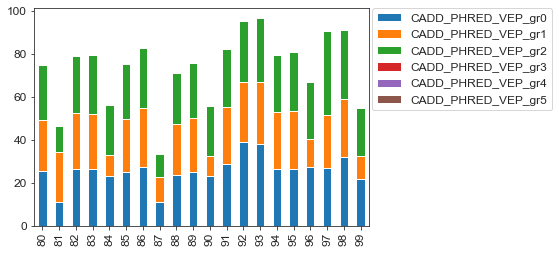

In [326]:
plt.figure(figsize = (16, 10))
m5[['CADD_PHRED_VEP_gr0', 'CADD_PHRED_VEP_gr1', 'CADD_PHRED_VEP_gr2', 'CADD_PHRED_VEP_gr3', 'CADD_PHRED_VEP_gr4', 'CADD_PHRED_VEP_gr5']].plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0);


In [327]:
# not so easy
fig1 = go.Figure(
    data = [
        go.Bar(
            name = 'zero',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr0'],
            offsetgroup = 0,
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr0']),
        ),
        go.Bar(
            name = 'one',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr1'],
            offsetgroup = 0,
            base = m5['CADD_PHRED_VEP_gr0'],
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr1']),
        ),
        go.Bar(
            name = 'two',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr2'],
            offsetgroup = 0,
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr2']),
            base = [val1+val2 for val1, val2 in zip(m5['CADD_PHRED_VEP_gr0'], m5['CADD_PHRED_VEP_gr1'])],
        ),
        go.Bar(
            name = 'three',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr3'],
            offsetgroup = 0,
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr3']),
            base = [val1+val2+val3 for val1, val2, val3 in zip(m5['CADD_PHRED_VEP_gr0'], m5['CADD_PHRED_VEP_gr1'], m5['CADD_PHRED_VEP_gr2'])],
        ),
        go.Bar(
            name = 'four',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr4'],
            offsetgroup = 0,
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr4']),
            base = [val1+val2+val3+val4 for val1, val2, val3, val4 in zip(m5['CADD_PHRED_VEP_gr0'], m5['CADD_PHRED_VEP_gr1'], m5['CADD_PHRED_VEP_gr2'], m5['CADD_PHRED_VEP_gr3'])],
        ),
        go.Bar(
            name = 'five',
            x = m5['POS'],
            y = m5['CADD_PHRED_VEP_gr5'],
            offsetgroup = 0,
            hovertemplate = 'CADD Score Phred = %{y}}',
            text = list(m5['ALT_gr5']),
            base = [val1+val2+val3+val4+val5 for val1, val2, val3, val4, val5 in zip(m5['CADD_PHRED_VEP_gr0'], m5['CADD_PHRED_VEP_gr1'], m5['CADD_PHRED_VEP_gr2'], m5['CADD_PHRED_VEP_gr3'], m5['CADD_PHRED_VEP_gr4'])],
        ),
    ],
    layout = go.Layout(title = 'CADD Phred Scores Stacked', yaxis_title = 'CADD Phred Score'))
fig1.update_traces()
fig1.show()

In [358]:
# easier way, stop_lost with line width

fig = go.Figure(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr0'], name = 'Var1', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr0'])))))
fig.add_trace(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr1'], name = 'Var2', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr1'])))))
fig.add_trace(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr2'], name = 'Var3', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr2'])))))
fig.add_trace(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr3'], name = 'Var4', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr3'])))))
fig.add_trace(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr4'], name = 'Var5', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr4'])))))
fig.add_trace(go.Bar(x = m5['POS'], y = m5['CADD_PHRED_VEP_gr5'], name = 'Var6', marker = dict(line = dict(color = 'blue', width = list(m5['new_stop_gr5'])))))
fig.update_layout(barmode = 'stack')
fig.show()